In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [308]:
df = pd.read_csv('HRDataset.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


In [309]:
df.isnull()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
397,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
398,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
399,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


<Axes: >

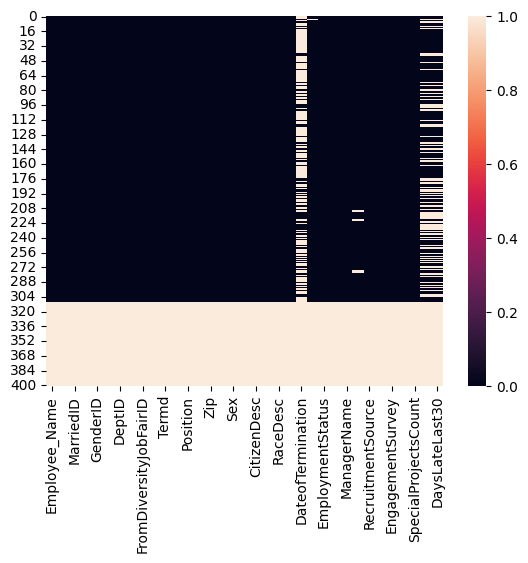

In [310]:
sns.heatmap(df.isnull())

<Axes: >

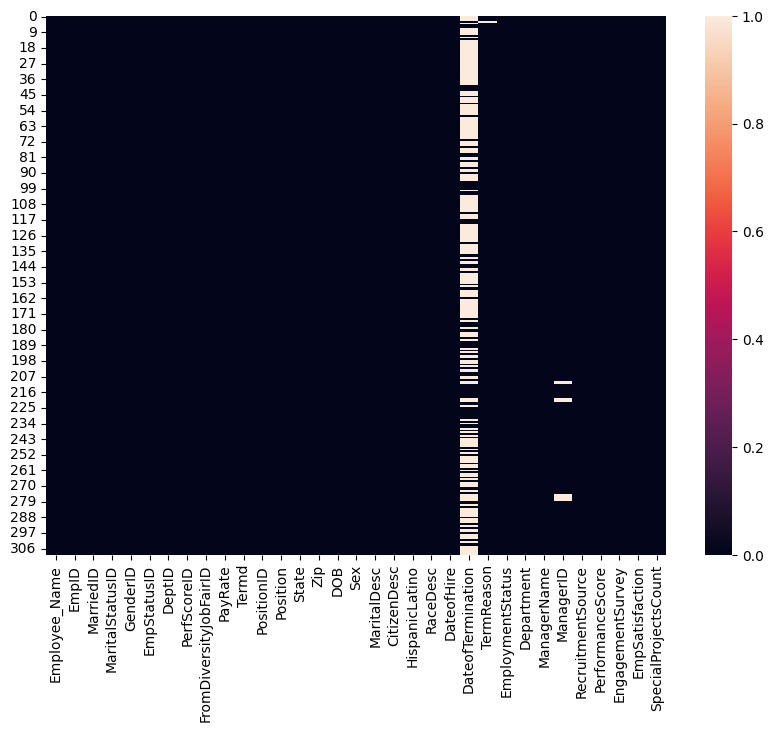

In [311]:
df.drop(['LastPerformanceReview_Date','DaysLateLast30'],axis=1,inplace=True)
df.dropna(thresh=2,inplace=True)
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull())

In [312]:
df[['DateofTermination','DOB','DateofHire']].dtypes
df[['DateofTermination','DOB','DateofHire']].head()

,DateofTermination,DOB,DateofHire
0,NaN,11/24/87,10/27/2008
1,NaN,04/26/84,1/6/2014
2,NaN,09/01/86,9/29/2014
3,04/15/15,09/16/85,2/16/2015
4,NaN,05/19/88,5/1/2015


In [313]:
df['DOB'] = pd.to_datetime(df['DOB'],format='%m/%d/%y')
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')
df[['DateofTermination','DOB','DateofHire']].head()

,DateofTermination,DOB,DateofHire
0,NaT,1987-11-24,2008-10-27
1,NaT,1984-04-26,2014-01-06
2,NaT,1986-09-01,2014-09-29
3,2015-04-15,1985-09-16,2015-02-16
4,NaT,1988-05-19,2015-05-01


In [314]:
#Czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym danego pracownika, a oceną wydajności pracy?
performance_order = ['Exceeds', 'Fully Meets', 'Needs Improvement', 'PIP']
df['PerformanceScore'] = pd.Categorical(df['PerformanceScore'], categories=performance_order, ordered=True)

In [315]:
pd.crosstab(df['ManagerName'],df['PerformanceScore'])

PerformanceScore,Exceeds,Fully Meets,Needs Improvement,PIP
ManagerName,,,,
Alex Sweetwater,2,6,1,0
Amy Dunn,3,15,1,2
Board of Directors,0,2,0,0
Brandon R. LeBlanc,0,7,0,0
Brannon Miller,7,9,1,4
Brian Champaigne,0,8,0,0
David Stanley,1,19,1,0
Debra Houlihan,0,2,1,0
Elijiah Gray,2,18,2,0


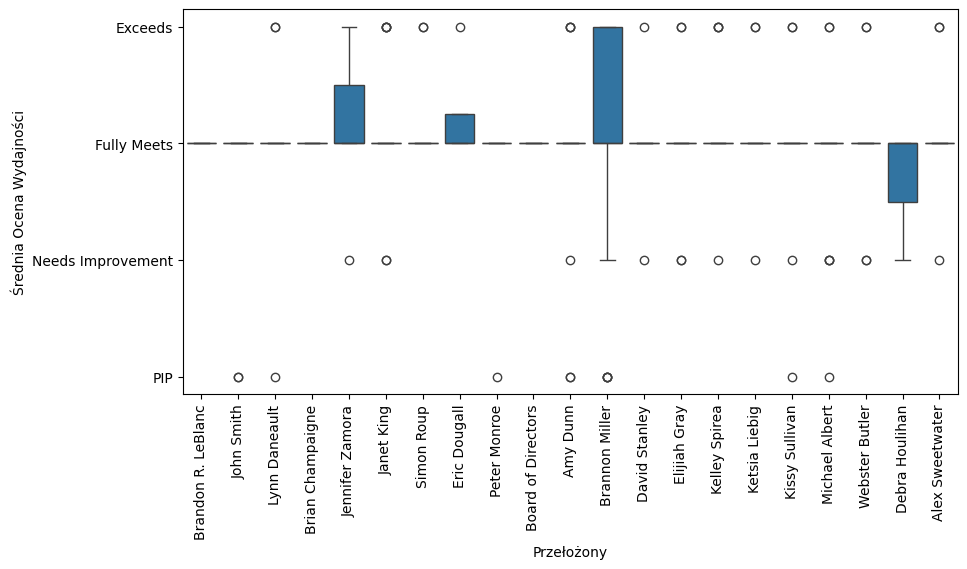

In [316]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='ManagerName', y='PerformanceScore', data=df)
plt.xlabel("Przełożony")
plt.ylabel("Średnia Ocena Wydajności")
plt.xticks(rotation=90)
plt.show()

In [317]:
#Jakie źródła pozyskania pracownika są najlepsze, jeśli zależy nam na jak najdłuższym stażu pracowników?
def count_seniority(row):

    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2019,9,27)
    else:
        end_date = row['DateofTermination']

    days_on_job = (end_date - pd.to_datetime(row['DateofHire'])).days
    seniority_years = days_on_job / 365

    return seniority_years

In [318]:
df['Seniority'] = df.apply(lambda row: count_seniority(row),axis=1)
df[['DateofHire', 'DateofTermination', 'Seniority']].head()

,DateofHire,DateofTermination,Seniority
0,2008-10-27,NaT,10.923288
1,2014-01-06,NaT,5.726027
2,2014-09-29,NaT,4.997260
3,2015-02-16,2015-04-15,0.158904
4,2015-05-01,NaT,4.410959


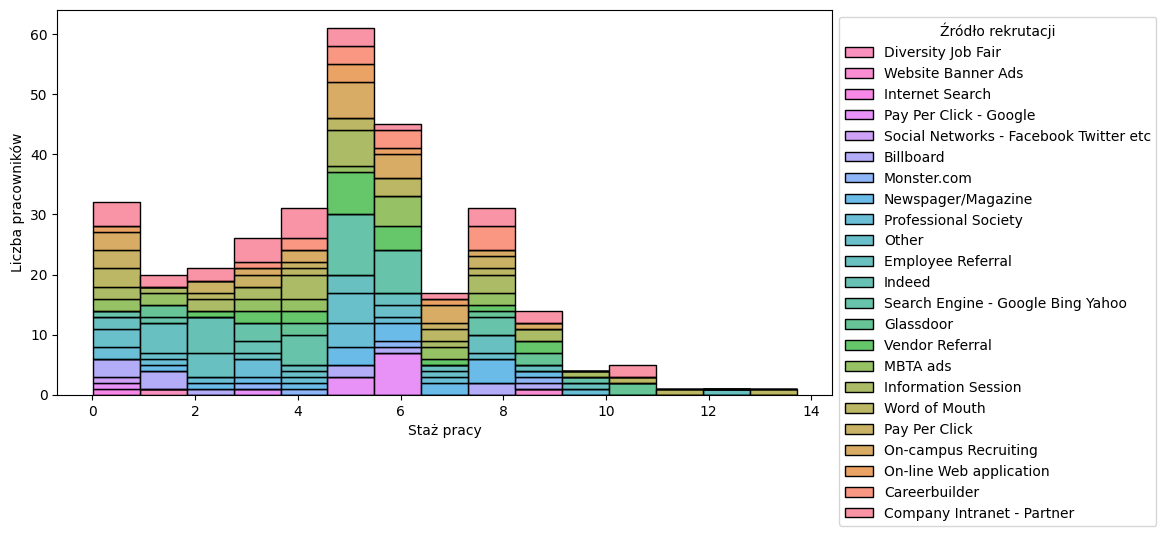

In [319]:
plt.figure(figsize=(10, 5))
sns.histplot(x="Seniority", hue="RecruitmentSource", data=df, multiple="stack")
plt.xlabel("Staż pracy")
plt.ylabel("Liczba pracowników")
plt.legend(title="Źródło rekrutacji", bbox_to_anchor=(1, 1), loc='upper left', labels=df['RecruitmentSource'].unique())
plt.show()

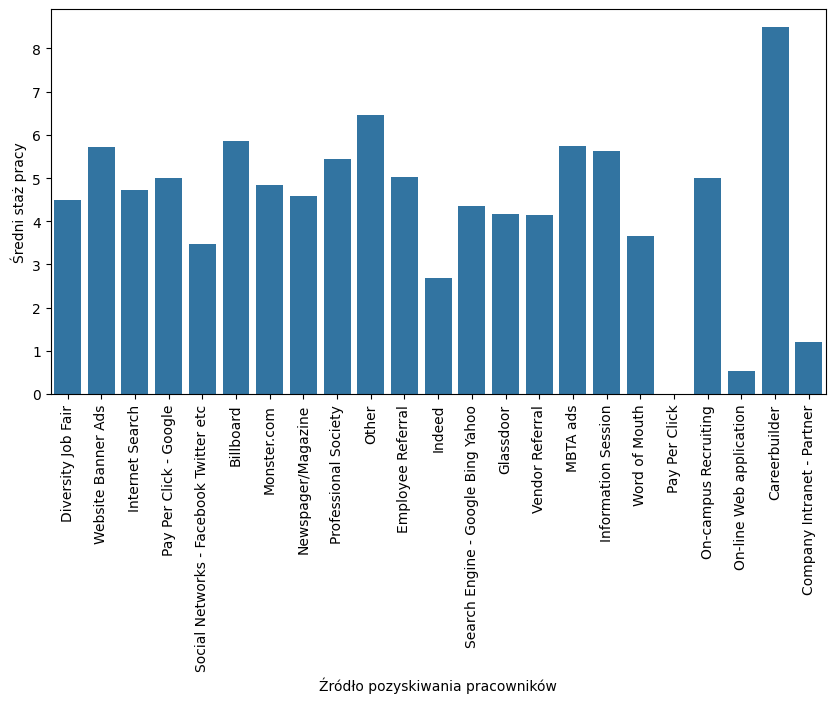

In [320]:
plt.figure(figsize=(10, 5))
sns.barplot(x='RecruitmentSource', y='Seniority', data=df, estimator='mean', errorbar=None)
plt.xlabel("Źródło pozyskiwania pracowników")
plt.ylabel("Średni staż pracy")
plt.xticks(rotation=90)
plt.show()

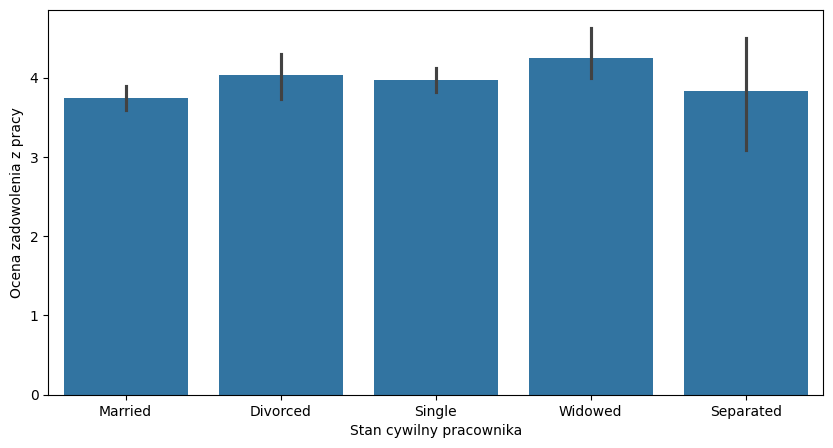

In [321]:
#Czy stan cywilny pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy?
plt.figure(figsize=(10, 5))
sns.barplot(x="MaritalDesc", y="EmpSatisfaction", data=df)
plt.xlabel("Stan cywilny pracownika")
plt.ylabel("Ocena zadowolenia z pracy")
plt.show()

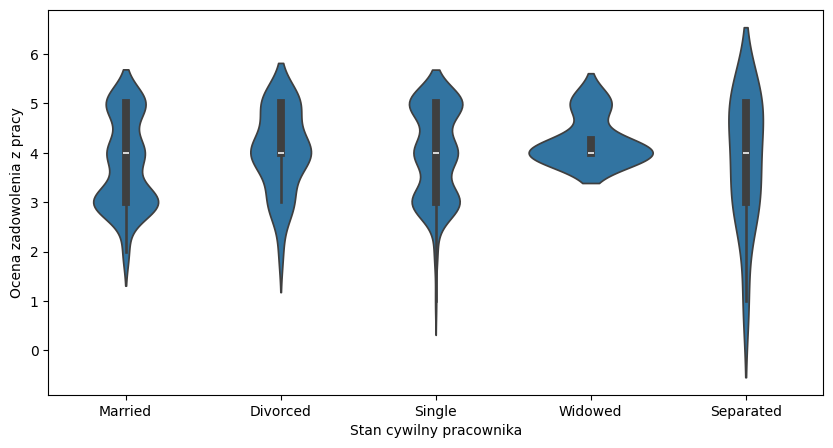

In [322]:
plt.figure(figsize=(10, 5))
sns.violinplot(x='MaritalDesc',y='EmpSatisfaction',data=df)
plt.xlabel("Stan cywilny pracownika")
plt.ylabel("Ocena zadowolenia z pracy")
plt.show()

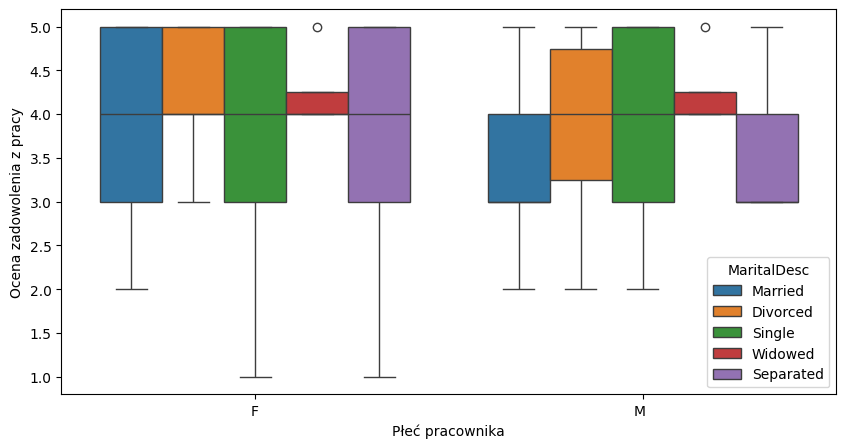

In [323]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Sex',y='EmpSatisfaction',data=df, hue='MaritalDesc')
plt.xlabel("Płeć pracownika")
plt.ylabel("Ocena zadowolenia z pracy")
plt.show()

In [324]:
#Jak wygląda struktura wieku aktualnie zatrudnionych pracowników?
df['Age'] = (pd.to_datetime('2019-09-27') - pd.to_datetime(df['DOB'])).dt.days / 365
df = df[df['Age'] >= 0]
df[['DOB', 'Age']].head()

,DOB,Age
0,1987-11-24,31.863014
1,1984-04-26,35.443836
2,1986-09-01,33.093151
3,1985-09-16,34.052055
4,1988-05-19,31.378082


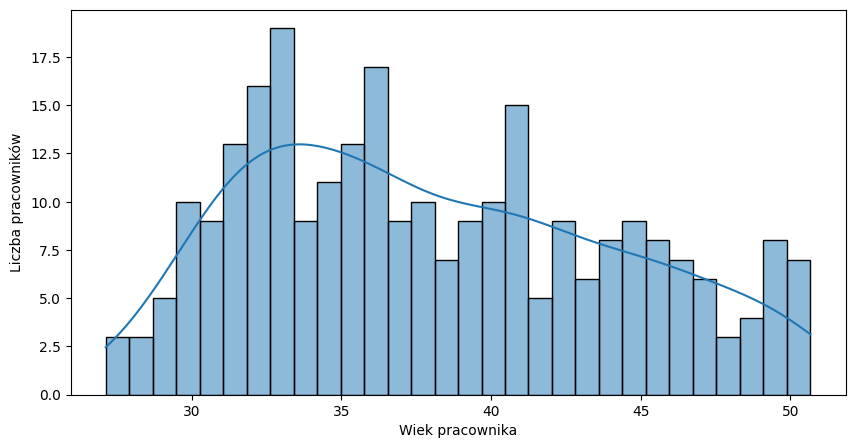

In [325]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], kde=True, bins=30)
plt.xlabel("Wiek pracownika")
plt.ylabel("Liczba pracowników")
plt.show()

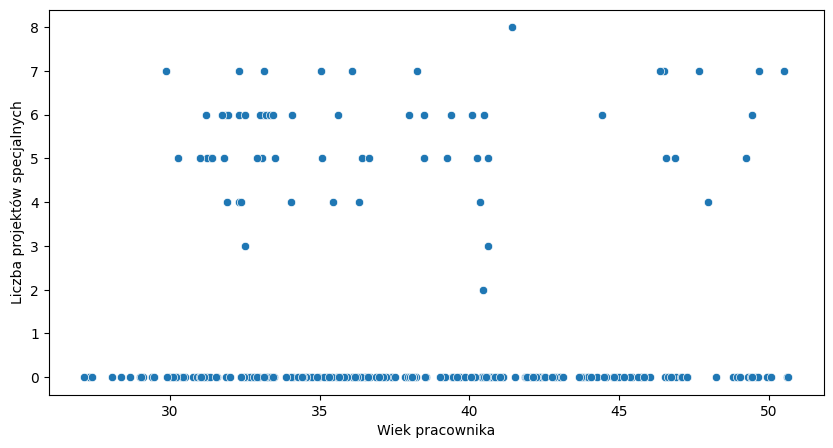

In [326]:
#Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy?
plt.figure(figsize=(10, 5))
sns.scatterplot(x="Age", y="SpecialProjectsCount", data=df)
plt.xlabel("Wiek pracownika")
plt.ylabel("Liczba projektów specjalnych")
plt.show()

<Figure size 1000x500 with 0 Axes>

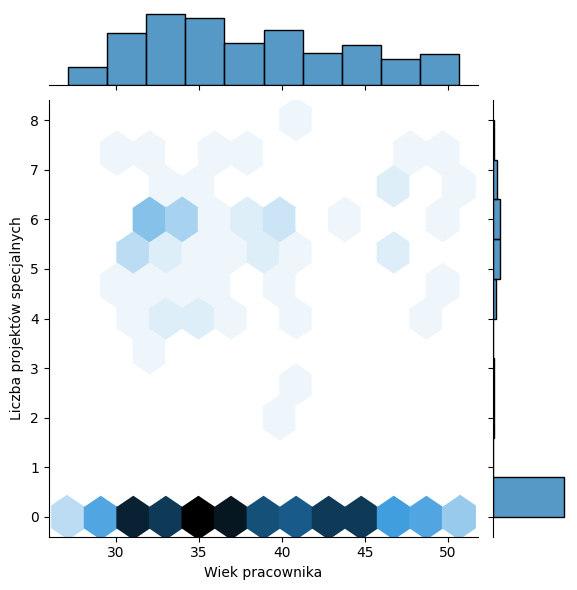

In [327]:
plt.figure(figsize=(10, 5))
sns.jointplot(x='Age',y='SpecialProjectsCount',data=df,kind='hex')
plt.xlabel("Wiek pracownika")
plt.ylabel("Liczba projektów specjalnych")
plt.show()

Opinia na temat wyżej wymienionych kwestii:
-  Brak zależność pomiędzy tym, kto jest bezpośrednim przełożonym danego pracownika, a oceną wydajności pracy. Znaczna większość pracowników w pełni spełnie oczekiwnia pracodawcy, co do oceny ich wydajności. Występują natomiast pojedyncze odchyłki w postaci pojedynczych pracowników, którzy przewyższają oczekiwania oraz wymagających planu poprawy wyników.
-  Najlepszym źródłem pozyskiwania pracowników jest Carrerbuilder, gdzie średni staż pracy zatrudnionych jest zdecydowanie najwiekszy.
-  Najbardziej zadowolone z pracy są osoby owdowiałe i rozwiedzione. Większy zróżnicowanie w ocenie zaobserwowano dla osób w związku małżeżnskim oraz singli.
-  Zdecydowanie najwięcej jest pracowników w wieku 30-35 lat, wraz z wzrostem wieku liczba pracownikó maleje. Najmniej jest pracowników w wieku do 30 lat.
-  Przy większej liczbie specjalnych projektów pracują młodsi pracownicy.